# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [30]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

CPU times: total: 0 ns
Wall time: 0 ns


In [31]:
%%time
X_train = pd.read_csv('X_train.csv', index_col=['Unnamed: 0'])
y_train = pd.read_csv('y_train.txt', header=None).squeeze('columns')
X_test = pd.read_csv('X_test.csv', index_col=['Unnamed: 0'])
y_test = pd.read_csv('y_test.txt', header=None).squeeze('columns')

CPU times: total: 0 ns
Wall time: 17.8 ms


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [32]:
%%time
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
for dataset, data_label in zip([X_train, X_valid, X_test], ['Treino', 'Validação', 'Teste']):
    print(f'{data_label} shape:', dataset.shape)

Treino shape: (5514, 3)
Validação shape: (1838, 3)
Teste shape: (2947, 3)
CPU times: total: 0 ns
Wall time: 0 ns


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [33]:
%%time
clf = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X_train, y_train)
top_vars = X_train.columns[np.argsort(clf.feature_importances_)[::-1][:3]]
print('Top 3 features:', top_vars)
X_train[top_vars].info()
path = clf.cost_complexity_pruning_path(X_train[top_vars], y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Top 3 features: Index(['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 5514 entries, 6593 to 7270
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   1 tBodyAcc-mean()-X  5514 non-null   float64
 1   2 tBodyAcc-mean()-Y  5514 non-null   float64
 2   3 tBodyAcc-mean()-Z  5514 non-null   float64
dtypes: float64(3)
memory usage: 172.3 KB
CPU times: total: 0 ns
Wall time: 32.8 ms


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

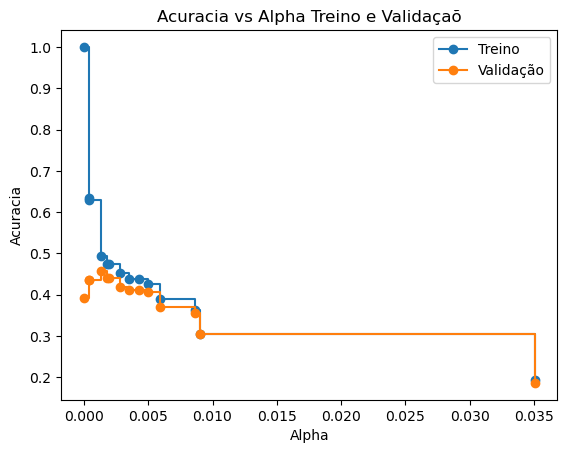

CPU times: total: 297 ms
Wall time: 685 ms


In [44]:
%%time
clfs = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(X_train[top_vars], y_train) for alpha in ccp_alphas]
train_scores = [clf.score(X_train[top_vars], y_train) for clf in clfs]
valid_scores = [clf.score(X_valid[top_vars], y_valid) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Acuracia')
ax.set_title('Acuracia vs Alpha Treino e Validaçaõ')
ax.plot(ccp_alphas, train_scores, marker='o', label='Treino', drawstyle='steps-post')
ax.plot(ccp_alphas, valid_scores, marker='o', label='Validação', drawstyle='steps-post')
ax.legend()
plt.show()
best_tree_index = np.argmax(valid_scores)
best_tree = clfs[best_tree_index]

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acuracia melhor arvore validação: 45.70%
Acuracia melhor arvore teste: 44.45%
CPU times: total: 31.2 ms
Wall time: 91.6 ms


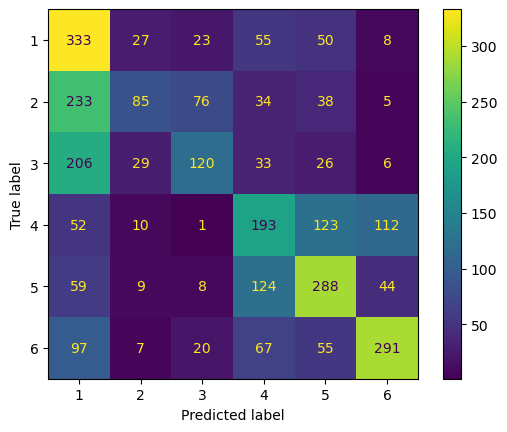

In [40]:
%%time
print(f'Acuracia melhor arvore validação: {valid_scores[best_tree_index] * 100:.2f}%')
accuracy_test = best_tree.score(X_test[top_vars], y_test)
print(f'Acuracia melhor arvore teste: {accuracy_test * 100:.2f}%')
ConfusionMatrixDisplay.from_estimator(estimator=best_tree, X=X_test[top_vars], y=y_test);